Some imports

In [1]:
#pandas & numpy
import pandas as pd
import numpy as np
#spacy & nltk
import spacy
import nltk 

#doc2vec
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

#wordnet
import wn
#en = wn.Wordnet('oewn:2021') 
#wn.similarity.path

- Corpus $\rightarrow$ Article
- Article $\rightarrow$ Summary?
- Article $\rightarrow$ doc2vec?



In [2]:
large_path = "topicdata/TBG_unique_raw.csv"
tag_path = "topicdata/topictags.xlsx"

In [3]:
tags = pd.read_excel(tag_path)

In [4]:
tags.head(10)


,Addiction
0,Aging
1,Aging in Prison
2,Health
3,Public Safety
4,Architecture
5,Arts
6,Biotech
7,Books
8,Boston Marathon
9,Bruins


In [5]:
#get 10k rows from .csv
#total of 164 chunks
#if r!=None 

def get_ten_k(nth, large_path):
    chunksize = 10 ** 4
    chunk_count = 0
    for chunk in pd.read_csv(large_path, chunksize=chunksize):
        if(chunk_count==nth):
            #return(chunk)
            #print(chunk_count)
            chunk_count+=1
            pass
        else:
            chunk_count+=1
        print(chunk_count)

# parameters: number of chunks, sample size in rows
def random_sample_corpus(chunkmax, samplesize):
    from_each_row = int(samplesize/chunkmax)
    chunksize = 10 ** 4
    chunk_count = 0
    for chunk in pd.read_csv(large_path, chunksize=chunksize):
        if(chunk_count == 0):
            s = chunk.sample(n = from_each_row)
            chunk_count += 1
        else:
            s2 = chunk.sample(n = from_each_row)
            s = pd.concat([s, s2])
            chunk_count+=1
    return(s)
    
sample = random_sample_corpus(164, 1000)
sample.head()

,pub_type,position_section,position_subsection,hl1,hl2,author,lede,body,language,word_count,copyright,content-id,volume,issue_number,edition,pub_name,pub_date,licensor_indexing_terms,indexing_terms
1165,NaN,METRO/REGION; Pg. B4,NaN,GOP challenger slams state auditing method;,NaN,NaN,The single state audit - a federally mandated...,"Michael Duffy, the Republican candidate for ...",['ENGLISH'],587.0,Copyright 1998 Globe Newspaper Company,NaN,NaN,NaN,",City Edition",The Boston Globe,"{'month': '10', 'day': '22', 'year': '1998'}",NaN,"{'subject': [{'score': '92', 'classCode': 'STX..."
7073,NaN,FOCUS; Pg. E5,NaN,When a harvest was more than corn;,NaN,NaN,"Haerfest, wrote Ziolkowski, also formed the r...","Two weeks ago, I put out a call for answers ...",['ENGLISH'],695.0,Copyright 1998 Globe Newspaper Company,NaN,NaN,NaN,",City Edition",The Boston Globe,"{'month': '11', 'day': '22', 'year': '1998'}",NaN,"{'subject': [{'score': '89', 'classCode': 'STX..."
652,NaN,LETTERS TO THE EDITOR; Pg. C6,NaN,Democrats could use some backbone;,NaN,NaN,"Yes, the public is repulsed at the GOP tactic...","Robert Kutter's article (""The Democrats shou...",['ENGLISH'],133.0,Copyright 1998 Globe Newspaper Company,NaN,NaN,NaN,",City Edition",The Boston Globe,"{'month': '10', 'day': '18', 'year': '1998'}",NaN,"{'subject': [{'score': '90', 'classCode': 'N81..."
6928,NaN,METRO/REGION; Pg. A1,NaN,"Beaten officer's lawsuit merits trial, judge f...",NaN,NaN,"Refusing to dismiss a lawsuit filed by Cox, U...",A federal judge found yesterday that the civ...,['ENGLISH'],914.0,Copyright 1998 Globe Newspaper Company,NaN,NaN,NaN,",City Edition",The Boston Globe,"{'month': '11', 'day': '25', 'year': '1998'}",NaN,"{'legal': [{'className': 'Civil Rights Law', '..."
9118,NaN,SPORTS; Pg. C2,NaN,American trio seeks upgrade to first-class;,NaN,NaN,Three American boxers assured themselves of at...,Mitchell is guaranteed at least three chances ...,['ENGLISH'],606.0,Copyright 1996 Globe Newspaper Company,NaN,NaN,NaN,NaN,The Boston Globe,"{'month': '07', 'day': '31', 'year': '1996'}",NaN,"{'subject': [{'score': '89', 'classCode': 'ST0..."


In [23]:
import spacy
from time import sleep
import sys

#least efficient code ever written
def mask_non_entity(corpus, field):
    nlp = spacy.load("en_core_web_trf")
    corpusentified = []
    count = 0
    for index, row in corpus.iterrows():
        row[field] = str(row[field])
        doc = nlp(str(row[field]))
        newstring = ""
        entities = []
        for ent in doc.ents:
            #print(ent.text, ent.start_char, ent.end_char, ent.label_)
            entities.append(ent.text)
        corpusentified.append(" ".join(entities))
                
        print(str(count) + " of " + str(corpus.shape[0]))
        count+=1
    return(corpusentified)
        #print(row[field])
    

In [24]:
sample2 = mask_non_entity(sample, 'body')


/home/aidan/.local/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


0 of 984
1 of 984
2 of 984
3 of 984
4 of 984
5 of 984
6 of 984
7 of 984
8 of 984
9 of 984
10 of 984
11 of 984
12 of 984
13 of 984
14 of 984
15 of 984
16 of 984
17 of 984
18 of 984
19 of 984
20 of 984
21 of 984
22 of 984
23 of 984
24 of 984
25 of 984
26 of 984
27 of 984
28 of 984
29 of 984
30 of 984
31 of 984
32 of 984
33 of 984
34 of 984
35 of 984
36 of 984
37 of 984
38 of 984
39 of 984
40 of 984
41 of 984
42 of 984
43 of 984
44 of 984
45 of 984
46 of 984
47 of 984
48 of 984
49 of 984
50 of 984
51 of 984
52 of 984
53 of 984
54 of 984
55 of 984
56 of 984
57 of 984
58 of 984
59 of 984
60 of 984
61 of 984
62 of 984
63 of 984
64 of 984
65 of 984
66 of 984
67 of 984
68 of 984
69 of 984
70 of 984
71 of 984
72 of 984
73 of 984
74 of 984
75 of 984
76 of 984
77 of 984
78 of 984
79 of 984
80 of 984
81 of 984
82 of 984
83 of 984
84 of 984
85 of 984
86 of 984
87 of 984
88 of 984
89 of 984
90 of 984
91 of 984
92 of 984
93 of 984
94 of 984
95 of 984
96 of 984
97 of 984
98 of 984
99 of 984
100 of 984

755 of 984
756 of 984
757 of 984
758 of 984
759 of 984
760 of 984
761 of 984
762 of 984
763 of 984
764 of 984
765 of 984
766 of 984
767 of 984
768 of 984
769 of 984
770 of 984
771 of 984
772 of 984
773 of 984
774 of 984
775 of 984
776 of 984
777 of 984
778 of 984
779 of 984
780 of 984
781 of 984
782 of 984
783 of 984
784 of 984
785 of 984
786 of 984
787 of 984
788 of 984
789 of 984
790 of 984
791 of 984
792 of 984
793 of 984
794 of 984
795 of 984
796 of 984
797 of 984
798 of 984
799 of 984
800 of 984
801 of 984
802 of 984
803 of 984
804 of 984
805 of 984
806 of 984
807 of 984
808 of 984
809 of 984
810 of 984
811 of 984
812 of 984
813 of 984
814 of 984
815 of 984
816 of 984
817 of 984
818 of 984
819 of 984
820 of 984
821 of 984
822 of 984
823 of 984
824 of 984
825 of 984
826 of 984
827 of 984
828 of 984
829 of 984
830 of 984
831 of 984
832 of 984
833 of 984
834 of 984
835 of 984
836 of 984
837 of 984
838 of 984
839 of 984
840 of 984
841 of 984
842 of 984
843 of 984
844 of 984
845 of 984

In [27]:
sample2 = pd.DataFrame(sample2)
sample2.rename(columns = {0:'body'}, inplace = True)
sample2.head()

,body
0,Michael Duffy Republican this week State A. Jo...
1,Two weeks ago English the 1300s two centuries ...
2,Robert Kutter's Democrats Oct. 4 Democrats Ame...
3,yesterday Boston Police Michael Cox Cox nine-y...
4,Mitchell at least three fourth 106-pound Alber...


## doc2vec

In [28]:
#get cores
import multiprocessing
from sklearn.feature_extraction import DictVectorizer
cores = multiprocessing.cpu_count()

def read_corpus(pdf, tokens_only=False):
    it=0
    for article in pdf['body'].values:
        if(isinstance(article, str)):
            tokens = gensim.utils.simple_preprocess(article)
            if tokens_only:
                yield tokens
            else:
                yield gensim.models.doc2vec.TaggedDocument(tokens, [it])
                it+=1
        else:
            pass

train_corpus = list(read_corpus(sample))
test_corpus = list(read_corpus(sample, tokens_only=True))

train_corpus_masked = list(read_corpus(sample2))
test_corpus_masked = list(read_corpus(sample2, tokens_only=True))

#load doc2vec model
#dm: distributed bag of words flag
#vector_size: # of features
#negative: # of noise words
#hs: sampling
#print(len(train_corpus))
#print(len(test_corpus))

In [73]:
d2v_model = Doc2Vec(vector_size=10, min_count=1, epochs=40)
d2v_model.build_vocab(train_corpus)
d2v_model.train(train_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

d2v_model_masked = Doc2Vec(vector_size=10, min_count=1, epochs=40)
d2v_model_masked.build_vocab(train_corpus_masked)
d2v_model_masked.train(train_corpus_masked, total_examples=d2v_model_masked.corpus_count, epochs=d2v_model_masked.epochs)

In [74]:
d2v_model.save("trained1028")
d2v_model_masked.save("trainedmasked1028")

In [86]:
doc_ids = [key for key in d2v_model.dv.index_to_key]
doc_vectors = np.array([d2v_model.dv[key] for key in doc_ids])

doc_ids_masked = [key for key in d2v_model_masked.dv.index_to_key]
doc_vectors_masked = np.array([d2v_model_masked.dv[key] for key in doc_ids_masked])


In [130]:
import umap

umap_args = {
    'n_neighbors': 2,
    'n_components': 10,
    'metric': 'cosine'
}

umap_model = umap.UMAP(**umap_args).fit(doc_vectors)
umap_model_masked = umap.UMAP(**umap_args).fit(doc_vectors_masked)

In [131]:
import hdbscan

hdbscan_args = {
    'min_cluster_size': 2,
    'metric': 'euclidean',
    'cluster_selection_method': 'eom'
}

clusters = hdbscan.HDBSCAN(**hdbscan_args).fit(umap_model.embedding_)
clusters_masked = hdbscan.HDBSCAN(**hdbscan_args).fit(umap_model_masked.embedding_)

In [136]:
doc_cluster_labels = clusters.labels_
doc_cluster_labels_masked = clusters_masked.labels_
doc_unique_cluster_labels = set(doc_cluster_labels)
doc_unique_cluster_labels_masked = set(doc_cluster_labels_masked)
print(doc_cluster_labels_masked.shape)
print(doc_cluster_labels.shape)


(984,)
(888,)


In [140]:
topics = {}
print(doc_vectors.shape)

for label in doc_unique_cluster_labels:
    label_mask = np.where(doc_cluster_labels == label)
    label_doc_vectors = doc_vectors[label_mask]

    label_doc_vectors_centroid = np.mean(label_doc_vectors, axis=0)
    
    topics[f'{label}'] = {
        'similar_words': d2v_model.wv.similar_by_vector(label_doc_vectors_centroid, 10)
    }
topics_masked = {}

for label in doc_unique_cluster_labels_masked:
    label_mask = np.where(doc_cluster_labels_masked == label)
    label_doc_vectors_masked = doc_vectors_masked[label_mask]
    
    label_doc_vectors_centroid_masked = np.mean(label_doc_vectors_masked, axis=0)
    
    topics_masked[f'{label}'] = {
        'similar_words': d2v_model_masked.wv.similar_by_vector(label_doc_vectors_centroid_masked, 10)
    }

print(label_doc_vectors.shape)
print(label_doc_vectors_masked.shape)


(888, 10)
(61, 10)
(52, 10)


In [128]:
#topics

In [129]:
#topics_masked

In [151]:
#nonlinear umap 
import umap

from sklearn.decomposition import PCA

#print(label_doc_vectors.shape)
#reducer = PCA(n_components=3)
#reducer.fit(X=label_doc_vectors)
#pca_transformed = reducer.transform(label_doc_vectors)


umapped = umap.UMAP(n_neighbors=50, random_state=42).fit(doc_vectors)
umapped_masked = umap.UMAP(n_neighbors=50, random_state=4).fit(doc_vectors_masked)

print(label_doc_vectors.shape)
print(label_doc_vectors_masked.shape)

print(umapped.embedding_.shape)
print(umapped_masked.embedding_.shape)

(61, 10)
(52, 10)
(888, 2)
(984, 2)


In [152]:
len(label_doc_vectors)

61

In [153]:
print(doc_cluster_labels.shape)
print(doc_cluster_labels_masked.shape)

(888,)
(984,)


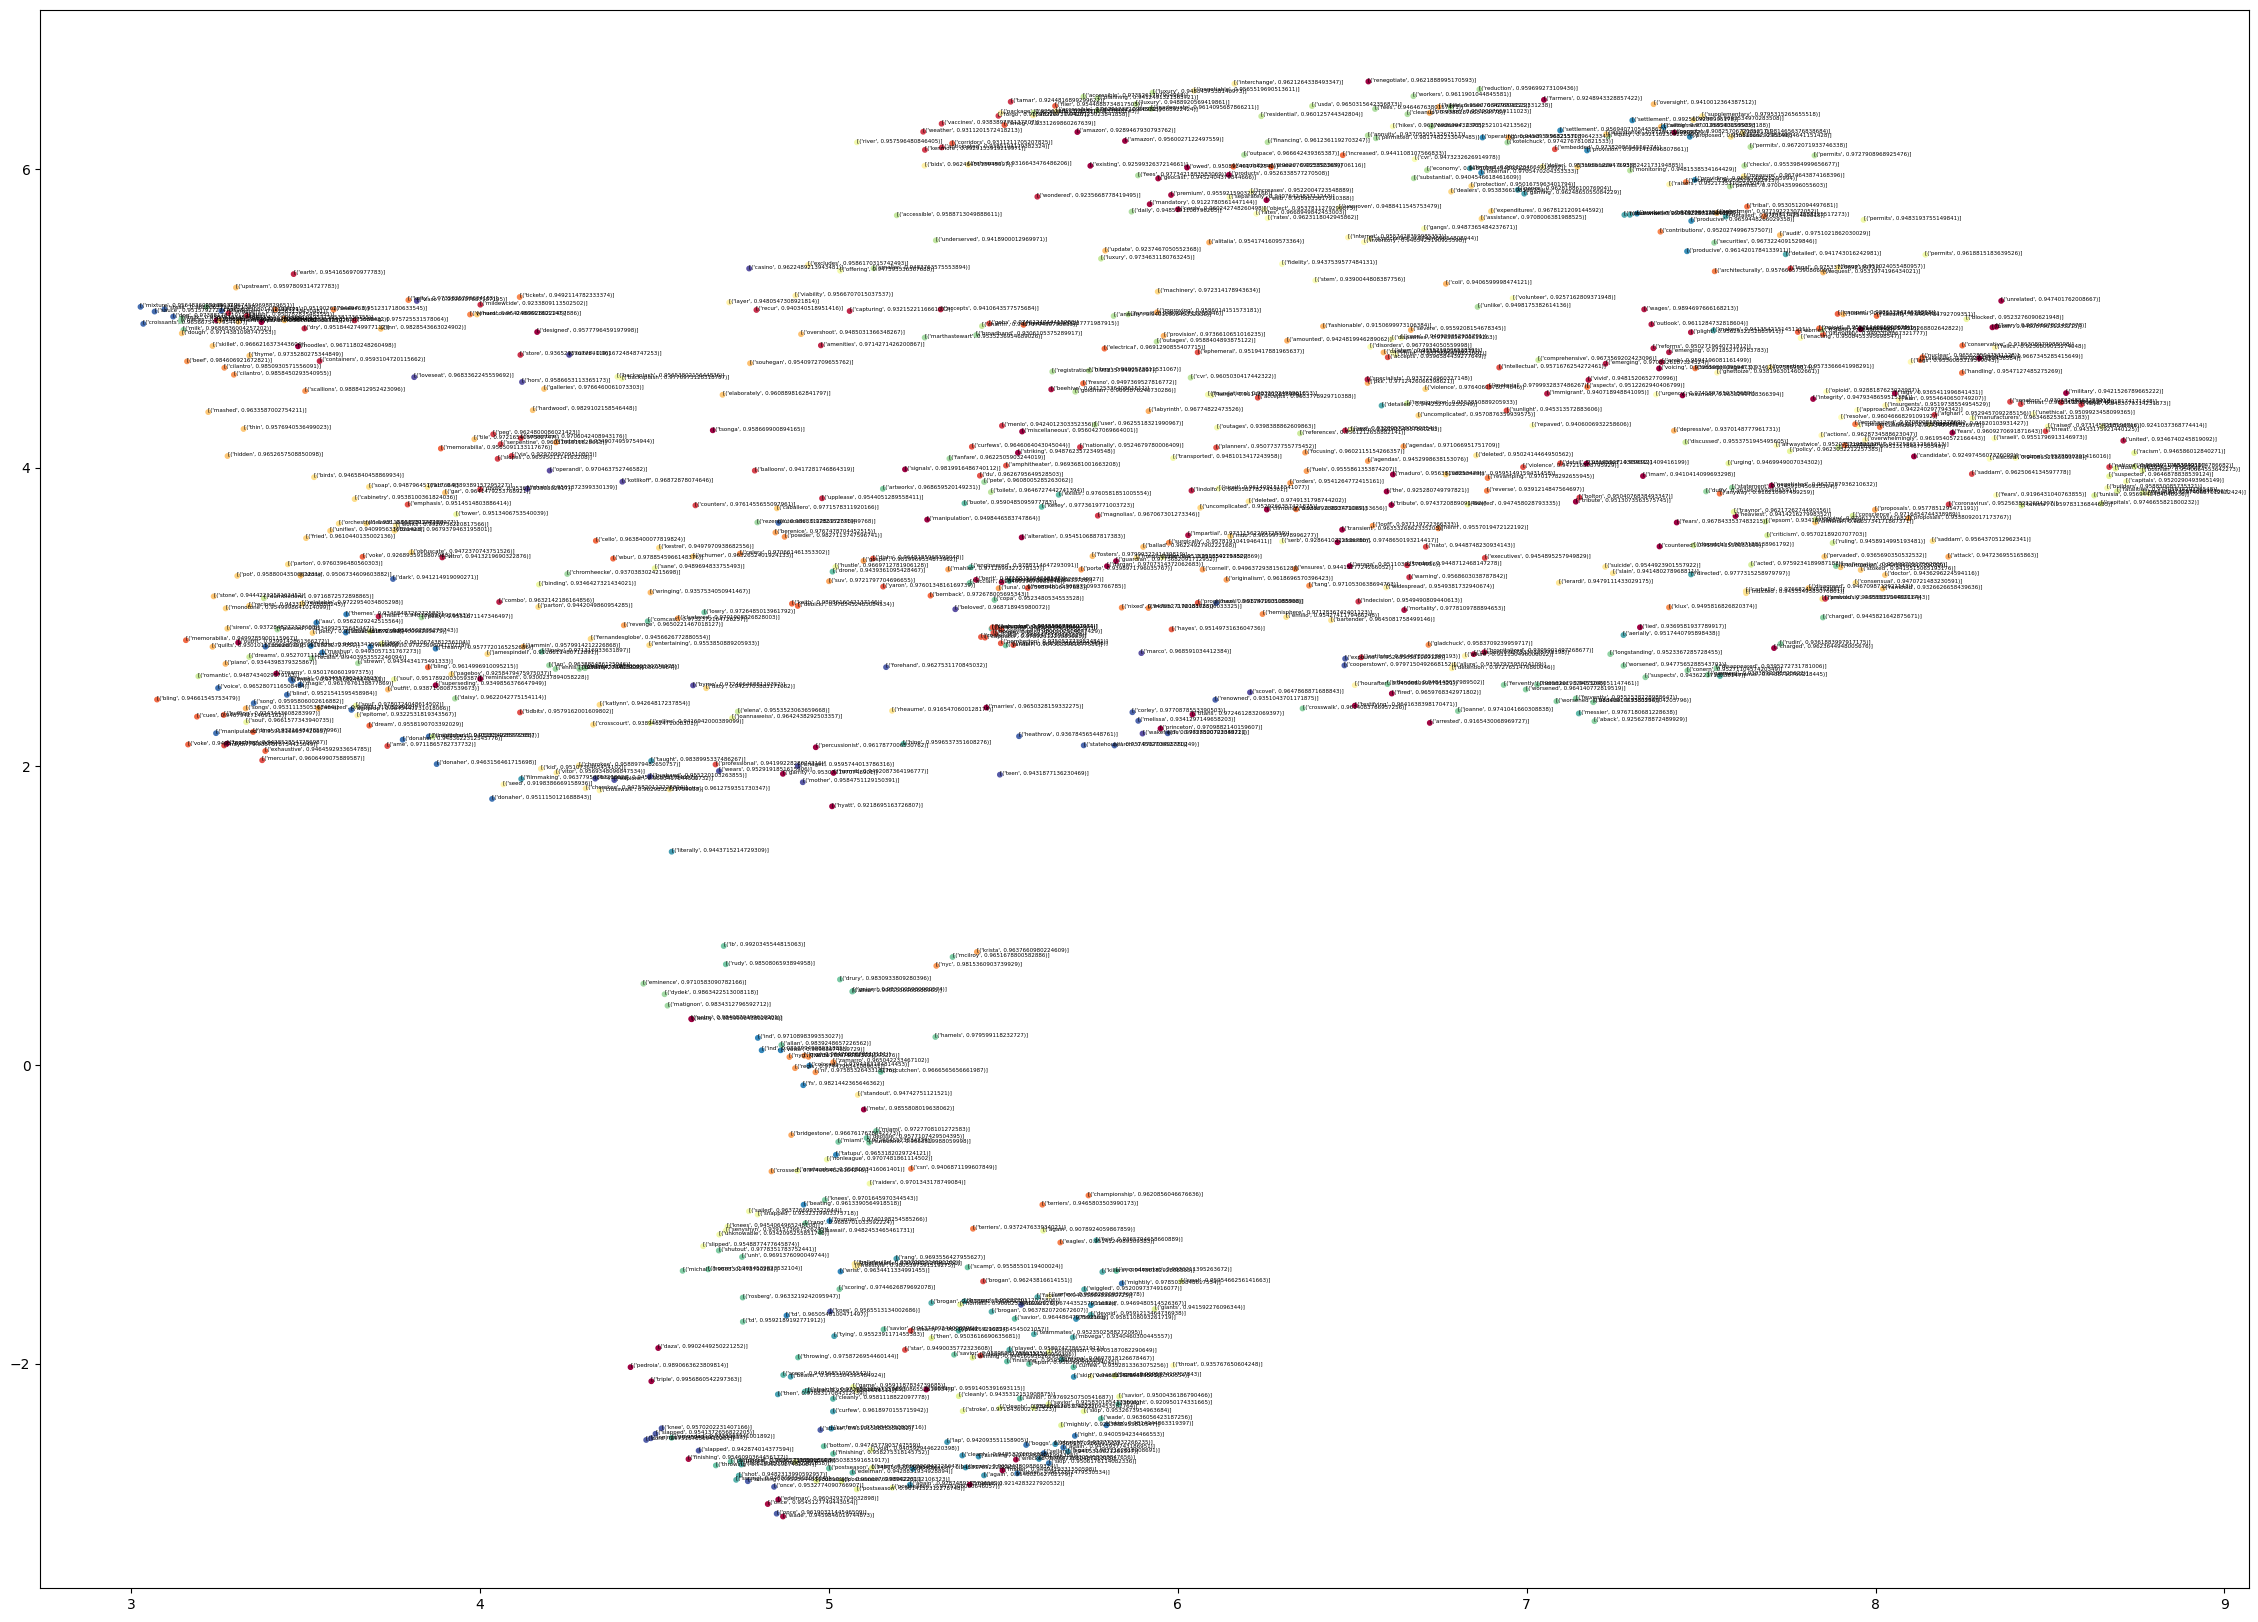

In [177]:
import seaborn as sns

import matplotlib.pyplot as plt



fig, ax = plt.subplots()
fig.set_size_inches(28.5, 20.5)

y = umapped.embedding_[:, 1]
z = umapped.embedding_[:, 0]
ax.scatter(y, z, s= 10, c=doc_cluster_labels[0:len(umapped.embedding_)], cmap='Spectral')
for i in range(0, len(y)):
    ax.annotate(d2v_model.wv.similar_by_vector(doc_vectors[i],1), (y[i], z[i]), fontsize=4)
fig.savefig('test.png', dpi=400)

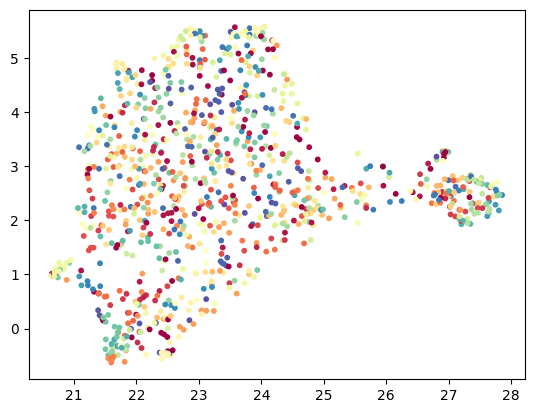

In [155]:
fig, ax = plt.subplots()
plt.scatter(umapped_masked.embedding_[:, 0], umapped_masked.embedding_[:, 1], s= 10, c=doc_cluster_labels_masked[0:len(umapped_masked.embedding_)], cmap='Spectral')


In [ ]:
#upload a set of tags -> match clustering to tags